# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

# reference
https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby/45925961
https://stackoverflow.com/questions/51102205/how-to-know-the-labels-assigned-by-astypecategory-cat-codes
https://stackoverflow.com/questions/45312377/how-to-one-hot-encode-from-a-pandas-column-containing-a-list
https://stackoverflow.com/questions/50522146/pandas-column-dict-split-to-new-column-and-rows
https://stackoverflow.com/questions/56421683/how-to-apply-a-function-for-each-row-of-a-dataframe-which-checks-keys-of-embedd
https://stackoverflow.com/questions/41455967/convert-datetime-string-to-new-columns-of-day-month-year-in-pandas-data-frame/41456152

https://stackoverflow.com/questions/43133605/convert-integer-yyyymmdd-to-date-format-mm-dd-yyyy-in-python
https://stackoverflow.com/questions/17134716/convert-dataframe-column-type-from-string-to-datetime-dd-mm-yyyy-format

https://stackoverflow.com/questions/49742938/checking-isdigit-on-python


#  : https://towardsdatascience.com/flattening-json-objects-in-python-f5343c794b10

In [1]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import matplotlib
#% matplotlib inline|

# read in the json files
portfolio = pd.read_json('portfolio.json', orient='records', lines=True)
profile = pd.read_json('profile.json', orient='records', lines=True)
transcript = pd.read_json('transcript.json', orient='records', lines=True)

# Part 1 :  Initial Dataset Statistics and basic EDA

## summary of portfolio statistics
- profile dataframe has age, gender catgorical features which we will need to encode
- only income and gender columns have more missing values - 2175
- become member on need to be changed to todal time they are member
- age max value 118 - looks like outlie

## summary of transcript statistics
- profile dataframe has age, gender catgorical features which we will need to encode
- only income and gender columns have more missing values - 2175
- become member on need to be changed to todal time they are member
- age max value 118 - looks like outlie

## summary of profile statistics
- profile dataframe has age, gender catgorical features which we will need to encode
- only income and gender columns have more missing values - 2175
- become member on need to be changed to todal time they are member
- age max value 118 - looks like outlier



In [2]:
# Check size of the data set
print('portfolio  shape is {}:' .format(portfolio.shape)) 
print('profile  shape is {}:' .format(profile.shape))   
print('transcript  shape is {}: ' .format(transcript.shape)) 



portfolio  shape is (10, 6):
profile  shape is (17000, 5):
transcript  shape is (306534, 4): 


In [3]:
# Check size of the basic statistics
print('portfolio statistics  {}:' .format(portfolio.describe())) 
 

portfolio statistics         difficulty   duration     reward
count   10.000000  10.000000  10.000000
mean     7.700000   6.500000   4.200000
std      5.831905   2.321398   3.583915
min      0.000000   3.000000   0.000000
25%      5.000000   5.000000   2.000000
50%      8.500000   7.000000   4.000000
75%     10.000000   7.000000   5.000000
max     20.000000  10.000000  10.000000:


In [4]:
print('portfolio data   {}:' .format(portfolio.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
channels      10 non-null object
difficulty    10 non-null int64
duration      10 non-null int64
id            10 non-null object
offer_type    10 non-null object
reward        10 non-null int64
dtypes: int64(3), object(3)
memory usage: 560.0+ bytes
portfolio data   None:


In [5]:
print('profile statistics  {}:' .format(profile.describe())) 
print('profile data   {}:' .format(profile.info()))  


profile statistics                  age  became_member_on         income
count  17000.000000      1.700000e+04   14825.000000
mean      62.531412      2.016703e+07   65404.991568
std       26.738580      1.167750e+04   21598.299410
min       18.000000      2.013073e+07   30000.000000
25%       45.000000      2.016053e+07   49000.000000
50%       58.000000      2.017080e+07   64000.000000
75%       73.000000      2.017123e+07   80000.000000
max      118.000000      2.018073e+07  120000.000000:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null int64
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.1+ KB
profile data   None:


Outlier in transcript 'age' column

In [6]:
print('transcript statistics  {}:' .format(transcript.describe())) 
print('transcript data   {}:' .format(transcript.info()))  

transcript statistics                  time
count  306534.000000
mean      366.382940
std       200.326314
min         0.000000
25%       186.000000
50%       408.000000
75%       528.000000
max       714.000000:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
event     306534 non-null object
person    306534 non-null object
time      306534 non-null int64
value     306534 non-null object
dtypes: int64(1), object(3)
memory usage: 9.4+ MB
transcript data   None:


Only need to deal with null value in profile - gender and income. 


In [7]:
# Check size of the statistics
print('portfolio null count {}:' .format(portfolio.isnull().sum())) 
print('profile null count{}:' .format(profile.isnull().sum()))   
print('transcript null count{}: ' .format(transcript.isnull().sum())) 

portfolio null count channels      0
difficulty    0
duration      0
id            0
offer_type    0
reward        0
dtype: int64:
profile null countage                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64:
transcript null countevent     0
person    0
time      0
value     0
dtype: int64: 


In [8]:
portfolio.head()

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


In [23]:
# cleaning function portfolio
# credit -  https://stackoverflow.com/questions/45312377/how-to-one-hot-encode-from-a-pandas-column-containing-a-list
# credit - https://stackoverflow.com/questions/29034928/pandas-convert-a-column-of-list-to-dummies

def portfolio_clean(portfolio):

    """ 
    Clean, select and transform a DataFrame containing information about offer type and duration
    INPUT:
        portfolio: DataFrame containing offer ids and meta data about 
                   each offer (duration, type, etc.)
    OUTPUT:
        portfolio: clean transformed portfolio DataFrame
    """  
    
    portfolio=portfolio.assign(**pd.get_dummies(portfolio.channels.apply(lambda x:pd.Series(x)).stack().reset_index(level=1,drop=True)).sum(level=0))

    #portfolio['id'] = [offer_id_col[item] for item in portfolio_df['id']] 
    portfolio.rename(columns={'id':'offer_id'}, inplace =True)
    
    portfolio.drop(['channels','reward'], axis=1, inplace=True)
    
    return portfolio



In [24]:
portfolio_df=portfolio_clean(portfolio)

In [25]:
portfolio_df.head()

,difficulty,duration,offer_id,offer_type,email,mobile,social,web
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,1,1,1,0
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,1,1,1,1
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,1,1,0,1
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,1,1,0,1
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,1,0,0,1


col_portfolio= [portfolio_df.columns.tolist()]
col_portfolio

col_portfolio= ['difficulty', 'duration','reward', 'email', 'mobile', 'offer_id', 'social', 'web']

for column_name in col_portfolio:
    ax=plt.subplots(figsize=(6,3))
    ax=portfolio_df[column_name].value_counts().plot(kind='bar')
    title="Histogram of " + column_name
    plt.title(title, fontsize=12)
    plt.show()


In [26]:
# cleaning function profile
# credit -  https://stackoverflow.com/questions/43133605/convert-integer-yyyymmdd-to-date-format-mm-dd-yyyy-in-python


def profile_clean(profile):

    """ 
    Clean, select and transform a DataFrame containing a demographic data for each customer
    INPUT:
        profile: DataFrame containing offer ids and meta data about 
                   each offer (duration, type, etc.)
    OUTPUT:
        profile: clean and transformed profile DataFrame
    """  
    

    profile['date_time']  = profile[['became_member_on']].applymap(str).applymap(lambda s: "{}/{}/{}"
                                                                                 .format( s[0:4],s[4:6],s[6:]))
                            
    # only gender and income column showed nan values. We will clean the data
    profile= profile.dropna(axis=0, subset=['gender'])
    
    # keep only year unless want to calculate membership period then we may need month and date 
    profile['year'] = pd.DatetimeIndex(profile['date_time']).year   

    profile.rename(columns={'id':'customer_id'}, inplace =True)
    profile.drop(['date_time', 'became_member_on'], axis=1,inplace=True)

    return profile





In [27]:
profile_df=profile_clean(profile)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [28]:
profile_df.head()

,age,gender,customer_id,income,year
1,55,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2017
3,75,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017
5,68,M,e2127556f4f64592b11af22de27a7932,70000.0,2018
8,65,M,389bc3fa690240e798340f5a15918d5c,53000.0,2018
12,58,M,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2017


In [29]:
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


# Not all users receive the same offer
#Different validity period the offer type and informational offer to influence customer.
 #Customer might make a purchase through the app without having received an offer or seen an offer
 #A user can receive an offer, never actually view the offer, and still complete the offer

In [30]:
# cleaning function transcript
# credit - https://stackoverflow.com/questions/58383927/convert-series-of-dict-and-concat-to-dataframe
#https://stackoverflow.com/questions/38134012/pandas-dataframe-fillna-only-some-columns-in-place

def transcript_clean(transcript):

    """ 
    Clean, select and transform a DataFrame containing the records for transactions,
    offer types : received, viewed, completed
    INPUT:
        transcript: DataFrame containing records of transaction, customer id, time and value
                   each offer (duration, type, etc.)
    OUTPUT:
        transcript: clean and transformed transcript DataFrame
    """  
    # value column contains disctionary with amount, reward and offer id 
    # it results in nan columns which we will clean later
    transcript = pd.concat([transcript, transcript['value'].apply(pd.Series)], axis = 1)
    
    # we will delete offer_id column , it contains duplicate/missing information from offer id related to reward - 
    #we can fill that information from offer_id column - reward offer id
    transcript['offer_id'].fillna(transcript['offer id'],inplace=True)
    transcript.rename(columns={'person':'customer_id'}, inplace =True)
    transcript.drop(['value', 'offer id'], axis=1,inplace=True)
    #convert number of days - time column to 
    transcript['time'] = transcript['time']/24
    

    return transcript

In [31]:
transcript_df=transcript_clean(transcript)

In [32]:
transcript_df.head()

,event,customer_id,time,amount,offer_id,reward
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0.0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,offer received,a03223e636434f42ac4c3df47e8bac43,0.0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,offer received,e2127556f4f64592b11af22de27a7932,0.0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0.0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,offer received,68617ca6246f4fbc85e91a2a49552598,0.0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


In [33]:
temp_df = pd.merge(transcript_df, profile_df, on='customer_id')
df_final = pd.merge(temp_df, portfolio_df, on='offer_id', how='left')
    

In [34]:
portfolio_df.head()

,difficulty,duration,offer_id,offer_type,email,mobile,social,web
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,1,1,1,0
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,1,1,1,1
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,1,1,0,1
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,1,1,0,1
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,1,0,0,1


In [36]:
temp_df.head()

,event,customer_id,time,amount,offer_id,reward,age,gender,income,year
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0.00,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,75,F,100000.0,2017
1,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,0.25,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,75,F,100000.0,2017
2,transaction,78afa995795e4d85b5d9ceeca43f5fef,5.50,19.89,NaN,NaN,75,F,100000.0,2017
3,offer completed,78afa995795e4d85b5d9ceeca43f5fef,5.50,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,75,F,100000.0,2017
4,transaction,78afa995795e4d85b5d9ceeca43f5fef,6.00,17.78,NaN,NaN,75,F,100000.0,2017


In [35]:
df_final.head()

,event,customer_id,time,amount,offer_id,reward,age,gender,income,year,difficulty,duration,offer_type,email,mobile,social,web
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0.00,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,75,F,100000.0,2017,5.0,7.0,bogo,1.0,1.0,0.0,1.0
1,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,0.25,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,75,F,100000.0,2017,5.0,7.0,bogo,1.0,1.0,0.0,1.0
2,transaction,78afa995795e4d85b5d9ceeca43f5fef,5.50,19.89,NaN,NaN,75,F,100000.0,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,offer completed,78afa995795e4d85b5d9ceeca43f5fef,5.50,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,75,F,100000.0,2017,5.0,7.0,bogo,1.0,1.0,0.0,1.0
4,transaction,78afa995795e4d85b5d9ceeca43f5fef,6.00,17.78,NaN,NaN,75,F,100000.0,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN


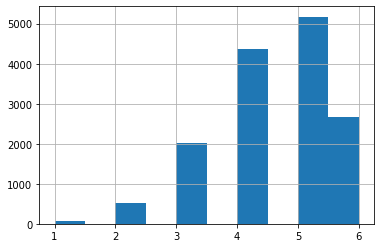

In [37]:
df_final[df_final['event']=='offer received'].groupby('customer_id')['event'].count().hist()

# More transaction occured. 
#Effective offer will be between intersection of  offer recieved, and offer completed. create a new daaframe
# customer segmentations for this new dataframe
# we can keep trasaction at time 0 which are not influenced by offer ,
#we can create test dataset to predict the effectivenes of offer from transaction at time=0 offer. 


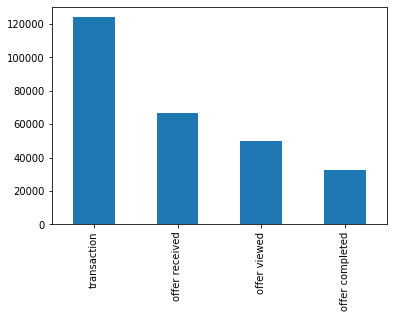

In [38]:
df_final['event'].value_counts().plot.bar()

# we will combine all offers together to carry out customer segmentation and effective offer model development. 
we will delete following columns

### offer _colmpleted - email, mobile reward_x and reward_y are duplicate columns for the combined df - drop
### offer_received e


In [39]:
df_offer_completed=df_final[(df_final['event'] =='offer completed')].copy()
df_offer_completed.dropna(axis=1, how='all',inplace=True)
df_offer_received=df_final[(df_final['event'] =='offer received')].copy()
df_offer_received.dropna(axis=1, how='all',inplace=True)
df_combine_transaction=df_final[(df_final['event'] =='transaction')].copy()
df_combine_transaction.dropna(axis=1, how='all',inplace=True)
df_offer_viewed=df_final[(df_final['event'] =='offer viewed')].copy()
df_offer_viewed.dropna(axis=1, how='all',inplace=True)
print(len(df_offer_completed),len(df_offer_received), len(df_combine_transaction), len(df_offer_viewed))

32444 66501 123957 49860


In [40]:
df_offer_completed.drop(['email', 'mobile', 'social', 'web'], axis=1,inplace=True)
df_offer_viewed.drop(['email', 'mobile', 'social', 'web'], axis=1,inplace=True)


#keep channels only in offer_recieved otherwise it will be duplicate data
#66501 offer sent, same customer may get multiple offers
#32444 offer completed, customers may have completed offer without knowing it. Regular customers
#Offer related transactions = 123957-32444=91513
#49860 offer viewed - we can find customer completing offer without viewing to obtain regular customers



In [41]:
df_offer_completed.head()

,event,customer_id,time,offer_id,reward,age,gender,income,year,difficulty,duration,offer_type
3,offer completed,78afa995795e4d85b5d9ceeca43f5fef,5.50,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,75,F,100000.0,2017,5.0,7.0,bogo
14,offer completed,78afa995795e4d85b5d9ceeca43f5fef,21.25,ae264e3637204a6fb9bb56bc8210ddfd,10.0,75,F,100000.0,2017,10.0,7.0,bogo
15,offer completed,78afa995795e4d85b5d9ceeca43f5fef,21.25,f19421c1d4aa40978ebb69ca19b0e20d,5.0,75,F,100000.0,2017,5.0,5.0,bogo
28,offer completed,e2127556f4f64592b11af22de27a7932,21.75,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,68,M,70000.0,2018,5.0,7.0,bogo
29,offer completed,e2127556f4f64592b11af22de27a7932,21.75,fafdcd668e3743c1bb461111dcafc2a4,2.0,68,M,70000.0,2018,10.0,10.0,discount


In [42]:
df_offer_received.head()

,event,customer_id,time,offer_id,age,gender,income,year,difficulty,duration,offer_type,email,mobile,social,web
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,75,F,100000.0,2017,5.0,7.0,bogo,1.0,1.0,0.0,1.0
5,offer received,78afa995795e4d85b5d9ceeca43f5fef,7.0,5a8bc65990b245e5a138643cd4eb9837,75,F,100000.0,2017,0.0,3.0,informational,1.0,1.0,1.0,0.0
10,offer received,78afa995795e4d85b5d9ceeca43f5fef,17.0,ae264e3637204a6fb9bb56bc8210ddfd,75,F,100000.0,2017,10.0,7.0,bogo,1.0,1.0,1.0,0.0
12,offer received,78afa995795e4d85b5d9ceeca43f5fef,21.0,f19421c1d4aa40978ebb69ca19b0e20d,75,F,100000.0,2017,5.0,5.0,bogo,1.0,1.0,1.0,1.0
18,offer received,e2127556f4f64592b11af22de27a7932,0.0,2906b810c7d4411798c6938adc9daaa5,68,M,70000.0,2018,10.0,7.0,discount,1.0,1.0,0.0,1.0


In [43]:
df_offer_viewed.head()

,event,customer_id,time,offer_id,age,gender,income,year,difficulty,duration,offer_type
1,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,0.25,9b98b8c7a33c4b65b9aebfe6a799e6d9,75,F,100000.0,2017,5.0,7.0,bogo
6,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,9.00,5a8bc65990b245e5a138643cd4eb9837,75,F,100000.0,2017,0.0,3.0,informational
11,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,17.00,ae264e3637204a6fb9bb56bc8210ddfd,75,F,100000.0,2017,10.0,7.0,bogo
17,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,24.25,f19421c1d4aa40978ebb69ca19b0e20d,75,F,100000.0,2017,5.0,5.0,bogo
19,offer viewed,e2127556f4f64592b11af22de27a7932,0.75,2906b810c7d4411798c6938adc9daaa5,68,M,70000.0,2018,10.0,7.0,discount


In [44]:
df_combine_transaction.head()

,event,customer_id,time,amount,age,gender,income,year
2,transaction,78afa995795e4d85b5d9ceeca43f5fef,5.50,19.89,75,F,100000.0,2017
4,transaction,78afa995795e4d85b5d9ceeca43f5fef,6.00,17.78,75,F,100000.0,2017
7,transaction,78afa995795e4d85b5d9ceeca43f5fef,9.25,19.67,75,F,100000.0,2017
8,transaction,78afa995795e4d85b5d9ceeca43f5fef,10.00,29.72,75,F,100000.0,2017
9,transaction,78afa995795e4d85b5d9ceeca43f5fef,15.75,23.93,75,F,100000.0,2017


In [47]:
df_offer_trasaction=df_combine_transaction[(df_combine_transaction['time']==0)].copy()
df_offer_trasaction.dropna(axis=1, how='all',inplace=True)

In [48]:
df_offer_trasaction.head()

,event,customer_id,time,amount,age,gender,income,year
364,transaction,02c083884c7d45b39cc68e1314fec56c,0.0,0.83,20,F,30000.0,2016
495,transaction,676506bad68e4161b9bbaffeb039626b,0.0,18.01,37,M,92000.0,2017
510,transaction,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,0.0,34.56,42,M,96000.0,2016
1783,transaction,fe97aa22dd3e48c8b143116a8403dd52,0.0,18.97,39,F,67000.0,2017
2136,transaction,629fc02d56414d91bca360decdfa9288,0.0,33.90,52,M,72000.0,2018


In [49]:
temp_offers = pd.merge(df_offer_received, df_offer_viewed, on=['customer_id','offer_id'], how='left')
df_alloffers_final = pd.merge(temp_offers, df_offer_completed, on=['customer_id', 'offer_id'], how='left')
print(len(df_alloffers_final))

102693


In [50]:
df_alloffers_final.head()

,event_x,customer_id,time_x,offer_id,age_x,gender_x,income_x,year_x,difficulty_x,duration_x,...,event,time,reward,age,gender,income,year,difficulty,duration,offer_type
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,75,F,100000.0,2017,5.0,7.0,...,offer completed,5.50,5.0,75.0,F,100000.0,2017.0,5.0,7.0,bogo
1,offer received,78afa995795e4d85b5d9ceeca43f5fef,7.0,5a8bc65990b245e5a138643cd4eb9837,75,F,100000.0,2017,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,offer received,78afa995795e4d85b5d9ceeca43f5fef,17.0,ae264e3637204a6fb9bb56bc8210ddfd,75,F,100000.0,2017,10.0,7.0,...,offer completed,21.25,10.0,75.0,F,100000.0,2017.0,10.0,7.0,bogo
3,offer received,78afa995795e4d85b5d9ceeca43f5fef,21.0,f19421c1d4aa40978ebb69ca19b0e20d,75,F,100000.0,2017,5.0,5.0,...,offer completed,21.25,5.0,75.0,F,100000.0,2017.0,5.0,5.0,bogo
4,offer received,e2127556f4f64592b11af22de27a7932,0.0,2906b810c7d4411798c6938adc9daaa5,68,M,70000.0,2018,10.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df_alloffers_final.isna().sum()

event_x             0
customer_id         0
time_x              0
offer_id            0
age_x               0
gender_x            0
income_x            0
year_x              0
difficulty_x        0
duration_x          0
offer_type_x        0
email               0
mobile              0
social              0
web                 0
event_y         15081
time_y          15081
age_y           15081
gender_y        15081
income_y        15081
year_y          15081
difficulty_y    15081
duration_y      15081
offer_type_y    15081
event           37701
time            37701
reward          37701
age             37701
gender          37701
income          37701
year            37701
difficulty      37701
duration        37701
offer_type      37701
dtype: int64

In [ ]:
df_alloffers_final['gender'].value_counts().plot.bar()

In [ ]:
df_alloffers_final['event'].unique()

In [ ]:
df_compleed_offer.drop(['offer_id','reward_x','difficulty', 'duration', 'offer_type',
       'reward_y', 'email', 'mobile', 'social', 'web'], axis=1,inplace=True)

In [ ]:
df_compleed_offer.head()

In [ ]:
df_compleed_offer['customer_id'].value_counts()

In [ ]:
df_transaction=df_final[(df_final['event'] =='transaction')].copy()

In [ ]:
len(df_transaction)

In [ ]:
df_transaction.isna().sum()

In [ ]:
df_transaction.columns

In [ ]:
df_transaction.drop(['offer_id','reward_x','difficulty', 'duration', 'offer_type',
       'reward_y', 'email', 'mobile', 'social', 'web'], axis=1,inplace=True)

In [ ]:
df_transaction.head()

In [ ]:
df_transaction['customer_id'].value_counts()

In [ ]:
df_final[df_final['event']=='offer received'].groupby('customer_id')['event'].count().hist()

In [ ]:
col_profile= [profile_df.columns.tolist()]

for column_name in col_portfolio:
    ax=plt.subplots(figsize=(6,3))
    ax=portfolio_df[column_name].value_counts().plot(kind='bar')
    title="Histogram of " + column_name
    plt.title(title, fontsize=12)
    plt.show()

In [ ]:
for column_name in col_profile:
    ax1=plt.subplots(figsize=(6,3))
    # get data by column_name and display a histogram
    ax1 = plt.hist(profile_df[column_name], bins=n_bins)
    title="Histogram of " + column_name
    plt.title(title, fontsize=12)
    plt.show()


In [ ]:
transcript